---
# Airbnb Data Analysis - Toronto

<p align="center"><img alt="Airbnb" src="https://i.imgur.com/nhQYrrg.png" width="60%"></p>


The [Airbnb](https://www.airbnb.com.br/) it's known as one of the biggest companies of the moment and gained good recognition in 11 years of history.

Briefly, it is a service that allows people to rent their houses or part of it for travelers around the world for a determined period.

At the beginning of 2020, Airbnb counted more than 7 million authentic and unique lofts.

**In this Notebook, we are going to analyze Toronto's database.**



---

## **Toronto**

Founded in 1824, Toronto is considered one of the more multicultural cities on the planet. It is the biggest city in Canada and the fourth biggest north-American county.

While walking by the city streets is easy to notice a strong influence coming from numerous cultures around the world. As an example, we have Little Italy and Chinatown, which both strongly represent the traditional culture of your ancestors.

The Canadian city is on the most popular travel destinations in the country because it offers a world of attractions, and let's not forget that it stays between Montreal, Chicago, and New York facilitating the permutation for tourists.

<img alt="Toronto" src="https://i.imgur.com/FEMtYga.jpg" width="100%">



---

## **Obtaining Data**

I obtained the data used in this Notebook from the [Inside Airbnb](http://insideairbnb.com/) website. They are an organization that uses tools and information to allow everyone to explore the cultural changes in the neighborhood that offers Airbnb accommodations.

For this analysis, we are going to use the following file:

* `listings.csv` = *Summary information and metrics for listings in Toronto (good for visualizations).*

In [ ]:
# Import packages
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use("ggplot")  # change the visualization style

%matplotlib inline

In [ ]:
# Import file listings.csv as a DataFrame
df = pd.read_csv("http://data.insideairbnb.com/canada/on/toronto/2020-05-07/visualisations/listings.csv")

---

## **Data Analysis**

The objective of this step is to understand the initial situation of the data and how it is structured.

>
**Variables Dictionary**

>```id``` - Id number generated for each housing
>
>```name``` - Name of the announced property
>
>```host_id``` - Host's Id number
>
>```host_name``` - Host's Name
>
>```neighbourhood_group``` - Does not contain a valid value
>
>```neighbourhood``` - Neighbourhood's name
>
>```latitude``` - Latitude coordinate
>
>```longitude``` - Longitude coordinate
>
>```room_type``` - Type of room offered
>
>```price```  - Rent value
>
>```minimum_nights``` - Minimum nights for renting
>
>```number_of_reviews``` - Number of review for each property
>
>```last_review``` - Date of last review
>
>```reviews_per_month``` - Review per month
>
>```calculated_host_listings_count``` - Number of listings per host
>
>```availability_365``` - Availability in 365 dayse

In [ ]:
# Getting to know the Dataset
df.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,1419,Beautiful home in amazing area!,1565,Alexandra,NaN,Little Portugal,43.64617,-79.42451,Entire home/apt,470,4,7,2017-12-04,0.12,1,0
1,8077,Downtown Harbourfront Private Room,22795,Kathie & Larry,NaN,Waterfront Communities-The Island,43.64105,-79.37628,Private room,105,180,169,2013-08-27,1.30,2,0
2,12604,Seaton Village Parlour Bedroom,48239,Rona,NaN,Annex,43.66724,-79.41598,Private room,70,1,0,NaN,NaN,1,0
3,23691,Queen Bedroom close to downtown,93825,Yohan & Sarah,NaN,Briar Hill-Belgravia,43.69602,-79.45468,Private room,72,1,217,2019-12-22,1.79,2,0
4,26654,World Class downtown @CN Tower Theatre MTCC ga...,113345,Adela,NaN,Waterfront Communities-The Island,43.64530,-79.38940,Entire home/apt,169,4,40,2020-03-20,0.35,5,365


### **Question 1 -> How many variables and entries the Dataset has? What are the variables' types?**

In [ ]:
# Identify the DataFrame's size
print("Entries:\t {}".format(df.shape[0]))
print("Variables:\t {}\n".format(df.shape[1]))

# Verify the dataset 5 first entries
display(df.dtypes)

Entries:	 21771
Variables:	 16



id                                  int64
name                               object
host_id                             int64
host_name                          object
neighbourhood_group               float64
neighbourhood                      object
latitude                          float64
longitude                         float64
room_type                          object
price                               int64
minimum_nights                      int64
number_of_reviews                   int64
last_review                        object
reviews_per_month                 float64
calculated_host_listings_count      int64
availability_365                    int64
dtype: object

### **Question 2 -> What is the percentage of the missing values?**

A dataset quality is directly related to the number of missing values on it. It is crucial to understand if the missing values are significant compared to the number of total entries.

In [ ]:
# Sort the variables in decreasing order by missing values percentage
(df.isnull().sum() / df.shape[0]).sort_values(ascending=False)

neighbourhood_group               1.000000
reviews_per_month                 0.193147
last_review                       0.193147
host_name                         0.000092
name                              0.000046
availability_365                  0.000000
calculated_host_listings_count    0.000000
number_of_reviews                 0.000000
minimum_nights                    0.000000
price                             0.000000
room_type                         0.000000
longitude                         0.000000
latitude                          0.000000
neighbourhood                     0.000000
host_id                           0.000000
id                                0.000000
dtype: float64

* We can see that the ```neighbourhood_group``` column has 100% missing values.

* Both ```reviews_per_month``` and ```last_review``` variables have missing values in almost 20% of its entries.

* The variables ```names```and ```host_name```have less than 1% of missing values.

###**Question 3 -> What are the variables' distribution type?**

Let's identify each distribution type. The easiest way to do this is by plotting histograms of each one and analyze them.

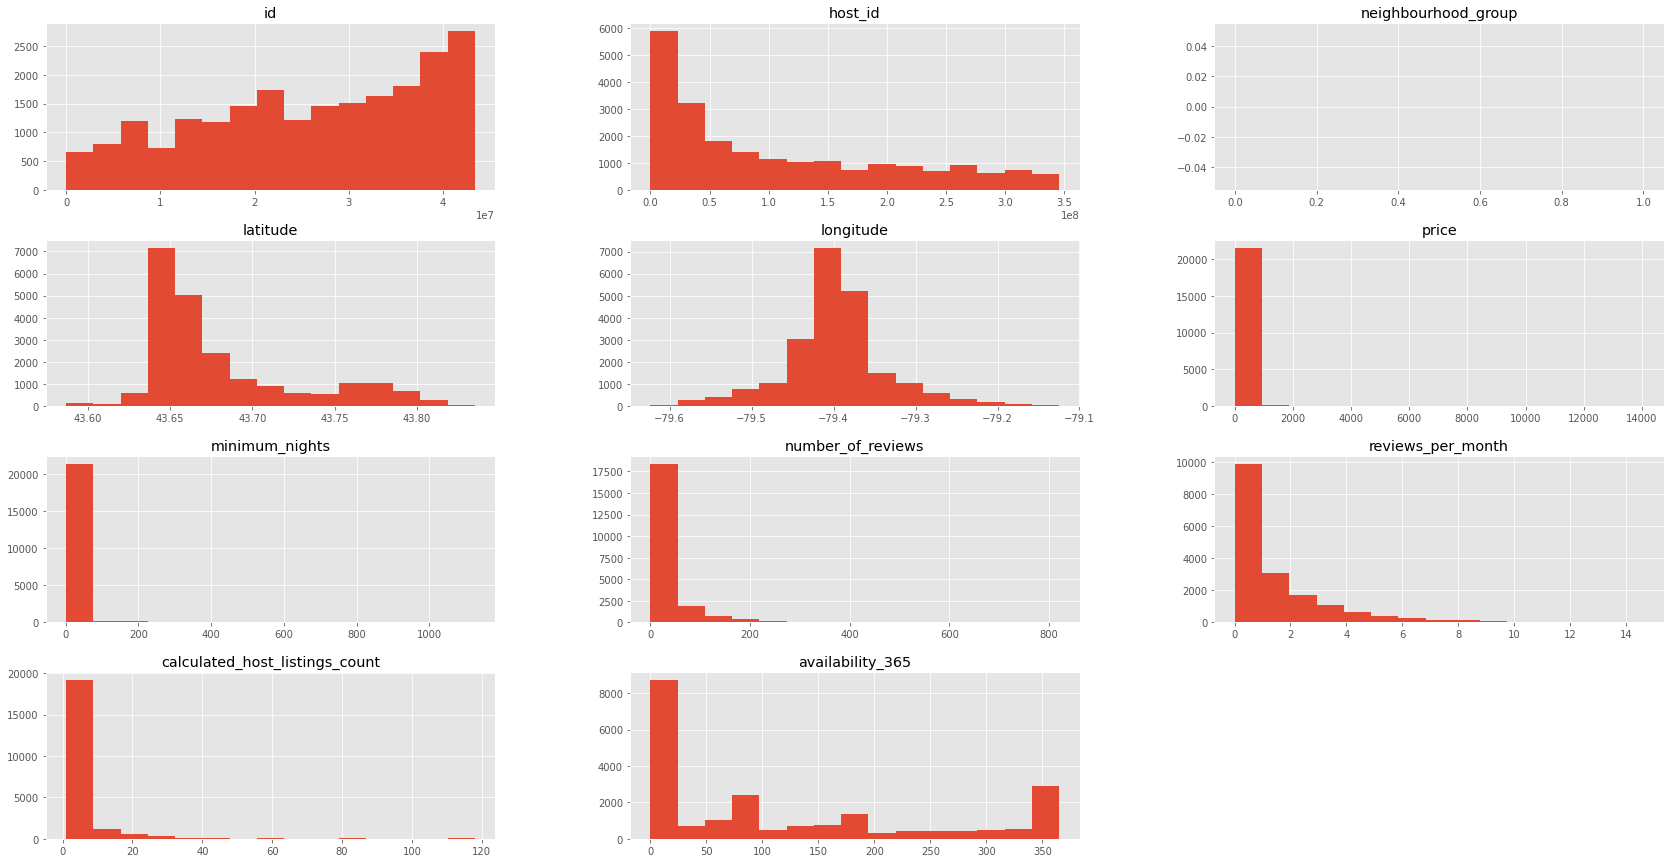

In [ ]:
# plot histograms of numerical variables
df.hist(bins=15, figsize=(29,15));

###**Question 4 -> There are outliers on the dataset?**

Analyzing the variables ```price```, ```minimum_nights``` and ```calculated_host_listings_count``` we see that they don't follow a distribution and deformed the graphic representation

In [ ]:
# numerical variavles' statistic summary
df[['price', 'minimum_nights', 'number_of_reviews', 'reviews_per_month', 'calculated_host_listings_count', 'availability_365']].describe()

,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
count,21771.000000,21771.000000,21771.000000,17566.000000,21771.000000,21771.000000
mean,144.614855,8.520417,28.167976,1.490266,5.064489,118.803822
std,297.619621,30.923437,53.018686,1.817760,12.230018,131.096867
min,0.000000,1.000000,0.000000,0.010000,1.000000,0.000000
25%,65.000000,1.000000,1.000000,0.260000,1.000000,0.000000
50%,100.000000,2.000000,7.000000,0.770000,1.000000,83.000000
75%,155.000000,5.000000,30.000000,2.050000,4.000000,201.000000
max,14058.000000,1125.000000,820.000000,14.620000,118.000000,365.000000


From the summary, it is possible to confirm the following hypothesis:

* The variable ```price``` has 75% of values below 155, yet your higher value is 14058.

* The minimum nights' quantity is above 365 days per year.

#### **```minimum_nights``` variable Boxplot**

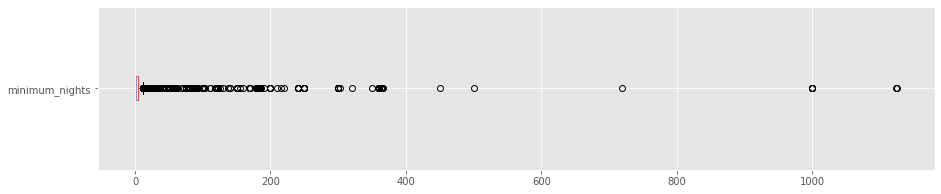

minimum_nights - values above 30 days:
560 entries
2.5722%


In [ ]:
# minimum_nights
df.minimum_nights.plot(kind='box', vert=False, figsize=(15,3))
plt.show()

# return the quantity of values above 30 days
print("minimum_nights - values above 30 days:")
print("{} entries".format(len(df[df.minimum_nights > 30])))
print("{:.4f}%".format((len(df[df.minimum_nights > 30]) / df.shape[0])*100))


#### **```price``` variable Boxplot**

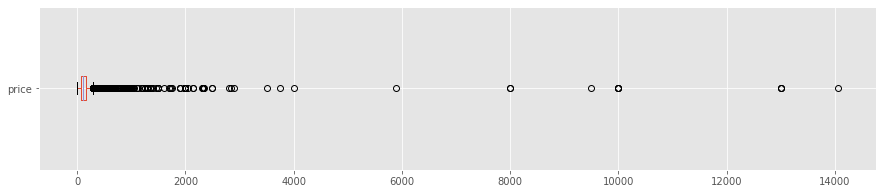

price - values above 900:
204 entries
0.9370%


In [ ]:
# price
df.price.plot(kind='box', vert=False, figsize=(15,3))
plt.show()

# return the quantity of values above 900
print("price - values above 900:")
print("{} entries".format(len(df[df.price > 900])))
print("{:.4f}%".format((len(df[df.price > 900]) / df.shape[0]) * 100))

#### **Histograms without outliers**

Now that the we've identified the outliers, we can clean the DataFrame

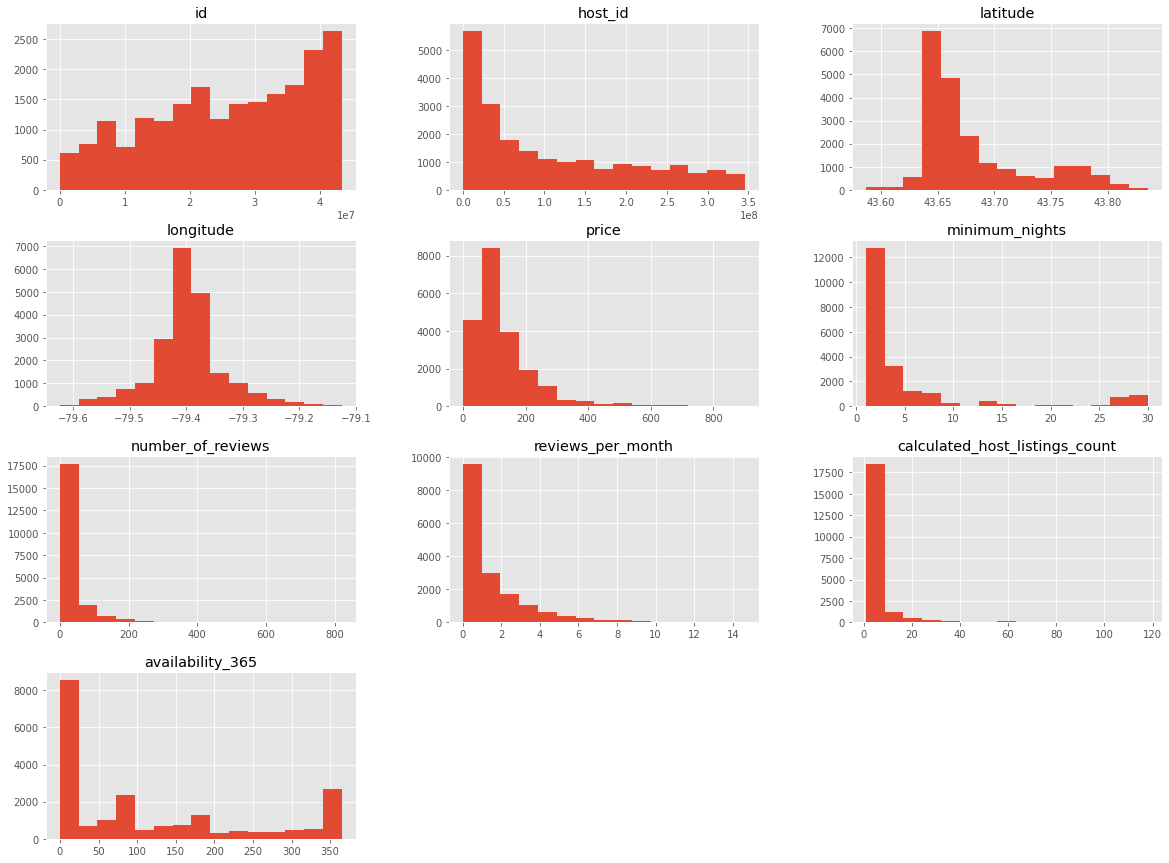

In [ ]:
# removing outliers
df_clean = df.copy()
df_clean.drop(df_clean[df_clean.price > 900].index, axis=0, inplace=True)
df_clean.drop(df_clean[df_clean.minimum_nights > 30].index, axis=0, inplace=True)

# remove `neighbourhood_group`
df_clean.drop('neighbourhood_group', axis=1, inplace=True)

# plot variables' histograms
df_clean.hist(bins=15, figsize=(20,15));

### **Question 5 -> What is the correlation between the variables?**

We are searching for a relation or similarity between two variables. This relation can be measured using the correlation coefficient to establish its intensity. 

To identify the correlation, we are going to follow the two steps below:

* Create a correlation matrix

* Generate a heatmap from the matrix using the ```seaborn``` library 

In [ ]:
# creating the correlation matrix
corr = df_clean[['price','minimum_nights','number_of_reviews','reviews_per_month','calculated_host_listings_count','availability_365']].corr()

display(corr)

,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
price,1.000000,0.002868,-0.011132,0.034567,0.025918,0.033543
minimum_nights,0.002868,1.000000,-0.028822,-0.028806,0.062645,0.106213
number_of_reviews,-0.011132,-0.028822,1.000000,0.747050,-0.046290,0.086396
reviews_per_month,0.034567,-0.028806,0.747050,1.000000,-0.042877,0.055182
calculated_host_listings_count,0.025918,0.062645,-0.046290,-0.042877,1.000000,0.140118
availability_365,0.033543,0.106213,0.086396,0.055182,0.140118,1.000000


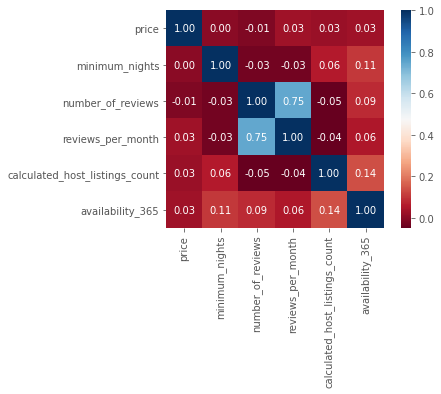

In [ ]:
# generate heatmap
sns.heatmap(corr, cmap='RdBu', fmt='.2f', square=True, linecolor='white', annot=True);

### **Question 6 -> How many listings exist in Toronto?**


In [ ]:
df_clean['id'].count()

21017

Based on the data, there are 21017 listings registered on Airbnb in the city

### **Question 7 -> What kind of listing is more popular?**

The column ```romm_type``` shows the type of location announced. Inside the website exist an option to choose between entire apt/homes, hotel rooms, rooms, or shared rooms.

Let's count the quantity of each one

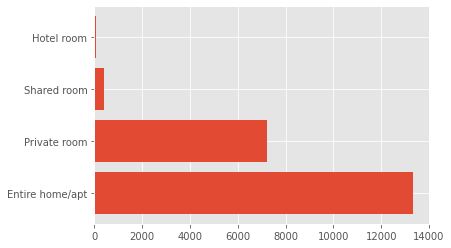

In [ ]:
place = dict(df_clean.room_type.value_counts())
names_q6 = list(place.keys())
values_q6 = list(place.values())
plt.barh(names_q6, values_q6);

### **Question 8 -> Which are the five neighborhoods with more available places?**

In [ ]:
df_clean['neighbourhood'].value_counts().sort_values(ascending=False)[:5]

Waterfront Communities-The Island    3763
Niagara                               927
Annex                                 777
Bay Street Corridor                   638
Church-Yonge Corridor                 617
Name: neighbourhood, dtype: int64

### **Question 9 -> Which neighborhoods have more reviews?**

Below we are going to find the five first neighborhoods with more reviews from past users

In [ ]:
df_clean.groupby(['neighbourhood']).number_of_reviews.sum().sort_values(ascending=False)[:5]

neighbourhood
Waterfront Communities-The Island    154517
Niagara                               29216
Annex                                 26732
Church-Yonge Corridor                 23806
Kensington-Chinatown                  23400
Name: number_of_reviews, dtype: int64

### **Question 10 -> Where are the most expensive locations?**

The list is showed in decreasing order of the mean price per night of each neighborhood

In [ ]:
round(df_clean.groupby(['neighbourhood']).price.mean().sort_values(ascending=False)[:5],2)

neighbourhood
Waterfront Communities-The Island    180.19
Leaside-Bennington                   171.36
Rosedale-Moore Park                  161.34
Lawrence Park South                  161.00
Old East York                        159.14
Name: price, dtype: float64

### **Question 11 -> What is the minimum nights' mean per neighborhood?**

What is the difference between the minimum nights' mean that the hosts define for the rent in the 5 neighborhoods with more listings?


neighbourhood
Ionview                 9.219512
Malvern                 7.886364
Englemount-Lawrence     7.846154
Pelmo Park-Humberlea    7.738095
Yorkdale-Glen Park      7.654930
Name: minimum_nights, dtype: float64


<BarContainer object of 5 artists>

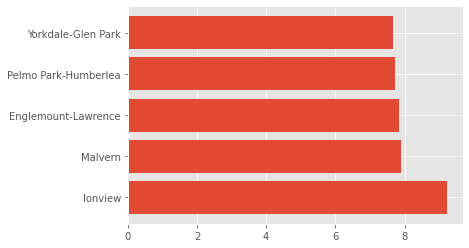

In [ ]:
min_list = dict(df_clean.groupby(['neighbourhood']).minimum_nights.mean().sort_values(ascending=False)[:5])
names_q11 = list(min_list.keys())
values_q11 = list(min_list.values())
print(df_clean.groupby(['neighbourhood']).minimum_nights.mean().sort_values(ascending=False)[:5])
plt.barh(names_q11,values_q11)

### **Question 12 -> Which listing has the best cost x benefit relation?**

After analyzing the past questions, you might believe that the best place to stay would be at Waterfront Comunities. However, while traveling, it's crucial to control your finances, so we can't determine the best place by only looking at the reviews.

As everyone knows, all products have a cost-benefit, and it determines which is best for each client, depending on its budget. When talking about renting, the same thing happens.

Here, we are going to calculate the neighborhoods with more reviews' cost-benefit.

In [ ]:
mean_reviews = df_clean.groupby(['neighbourhood']).number_of_reviews.sum().sort_values(ascending=False)[:10]

pl_price = df_clean.groupby(['neighbourhood']).price.sum().sort_values(ascending=False)

cost_benefit = (pl_price / mean_reviews).sort_values(ascending = True)[:5]
print(cost_benefit)

neighbourhood
Dovercourt-Wallace Emerson-Junction    2.809539
Kensington-Chinatown                   3.242906
Church-Yonge Corridor                  3.493993
Little Portugal                        3.556401
Annex                                  3.920432
dtype: float64


After evaluating this new variable, we see that the neighborhood which offers the best stay is the Dovercourt-Wallace Emerson-Junction, which is different from the expected result.

---

On the Dataset, we have two columns with Latitude and Longitude, and we're going to use it to plot a simple map and see how the listings distribute its locations.

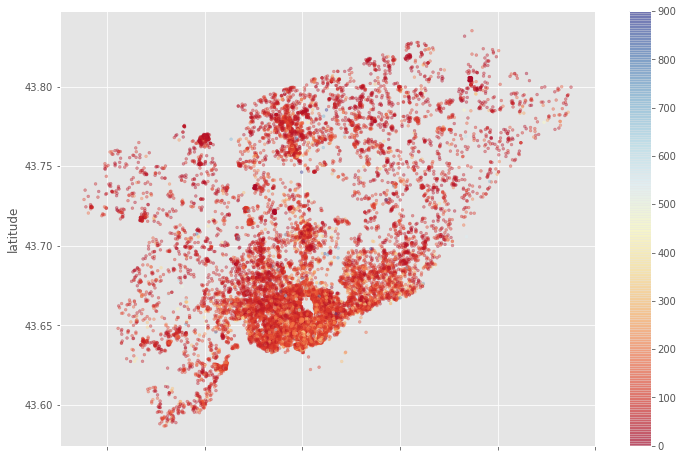

In [ ]:
# plot the listings latitude and longitude
df_clean.plot(kind='scatter', x='longitude', y='latitude', alpha=0.4, c=df_clean['price'], s=8,
              cmap=plt.get_cmap('RdYlBu'), figsize=(12,8));

## **Conclusion**

From the data available, it was possible to do an exploratory analysis where we've identified and dealt with outliers and missing values. Even if we used the simple version of the Dataset, it was possible to find interesting insights from the data, and anyone interested in visiting Toronto can use it easily.

That being said, let's remember some of these insights.

Toronto city has more than 20 thousand listings registered on Airbnb, divided into 64% of entire apt/houses, 34% of private rooms, 2% of shared rooms, and less than 0,5% of hotel rooms.

The neighborhood with more listings available and more reviews is the Waterfront Communities-The Island, in downtown. It is known as the house of Distillery District, the Fashion District, St. Lawrence Market, the West Don Lands, and Billy Bishop Airport, popular tourism places.


This study was a simple analysis based on the summarized data from Airbnb.  To a complete project, you can use the files available on [Inside Aibnb](http://insideairbnb.com/).